In [1]:
%pwd

'/Users/peiboxu/Desktop/merge-seq analysis/elife_revision/code_file'

In [2]:
#Run the below code in your notebook to check the installed version
import shap
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random
plt.rcParams['pdf.fonttype'] = 'truetype'
import numpy as np
import pandas as pd

/Users/peiboxu/mambaforge/envs/shap/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/peiboxu/mambaforge/envs/shap/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minim

In [3]:
df=pd.read_csv('../results/fig6_var100_AI_valid_binary_normdata_allcells.csv')
#df=pd.read_csv('../results/var10000_AI_valid_binary_normdata_1000cells_1000.csv',index_col=0)

In [4]:
df.shape

(8210, 101)

In [5]:
df['binary'].value_counts()

0    7405
1     805
Name: binary, dtype: int64

In [6]:
exp1 = setup(df, target = 'binary',session_id=1,index=False,n_jobs=4)

,Description,Value
0,Session id,1
1,Target,binary
2,Target type,Binary
3,Original data shape,"(8210, 101)"
4,Transformed data shape,"(8210, 101)"
5,Transformed train set shape,"(5747, 101)"
6,Transformed test set shape,"(2463, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9041,0.8241,0.1102,0.5645,0.1827,0.1556,0.2168,0.0470
lightgbm,Light Gradient Boosting Machine,0.9026,0.8211,0.1226,0.5113,0.1973,0.1658,0.2153,0.0420
et,Extra Trees Classifier,0.9024,0.8164,0.0248,0.6000,0.0468,0.0388,0.1012,0.0490
rf,Random Forest Classifier,0.9022,0.8174,0.0266,0.5005,0.0493,0.0405,0.0931,0.0580
dummy,Dummy Classifier,0.9020,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400
ridge,Ridge Classifier,0.9017,0.0000,0.0035,0.2000,0.0070,0.0049,0.0206,0.0390
lr,Logistic Regression,0.8989,0.8085,0.0853,0.4202,0.1410,0.1120,0.1537,0.0450
lda,Linear Discriminant Analysis,0.8921,0.8049,0.2186,0.4088,0.2825,0.2303,0.2446,0.0470
knn,K Neighbors Classifier,0.8916,0.7038,0.1687,0.3816,0.2326,0.1839,0.2022,0.0480
ada,Ada Boost Classifier,0.8897,0.7795,0.1296,0.3226,0.1836,0.1375,0.1538,0.0470


In [15]:
nb = create_model('nb')
Xtest = get_config('X_test')
ytest = get_config('y_test')
predict_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7043,0.7128,0.6250,0.1902,0.2917,0.1673,0.2148
1,0.6609,0.7644,0.7500,0.1883,0.3011,0.1722,0.2442
2,0.6870,0.7218,0.6786,0.1900,0.2969,0.1707,0.2281
3,0.6887,0.7626,0.7321,0.2000,0.3142,0.1903,0.2576
4,0.7026,0.7407,0.7018,0.2062,0.3187,0.1954,0.2556
5,0.7165,0.7557,0.6667,0.2088,0.3180,0.1967,0.2497
6,0.6748,0.7587,0.7544,0.1991,0.3150,0.1876,0.2594
7,0.7091,0.7969,0.7679,0.2183,0.3399,0.2217,0.2941
8,0.6498,0.7471,0.7500,0.1834,0.2947,0.1636,0.2357


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6967,0.7710,0.7355,0.2067,0.3228,0.2000,0.2672


,Cplx3,Tshz2,Npy,Myl4,Pbld1,Ptgs2,Dlk1,Gm13889,Cck,Lypd1,...,Rgs4,Sostdc1,Ier2,Timp2,Gm26772,Lpl,P2rx4,binary,prediction_label,prediction_score
5747,0.0,0.0,0.0,0.000000,0.0,1.069107,0.0,1.069107,5.186761,0.000000,...,2.666495,0.0,1.069107,2.357441,0.0,0.0,1.069107,0,1,1.0000
5748,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.214981,2.093183,...,2.349556,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0,1.0000
5749,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.475047,0.000000,...,3.918352,0.0,1.089470,2.385407,0.0,0.0,0.000000,0,1,1.0000
5750,0.0,0.0,0.0,2.886121,0.0,0.000000,0.0,0.000000,3.909832,0.000000,...,2.342001,0.0,2.508170,0.000000,0.0,0.0,0.000000,0,0,1.0000
5751,0.0,0.0,0.0,1.060195,0.0,0.000000,0.0,0.000000,0.000000,1.563157,...,4.020359,0.0,1.896240,1.563157,0.0,0.0,1.060195,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8205,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,2.168726,0.0,2.368740,1.918444,0.0,0.0,0.000000,0,0,1.0000
8206,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.070566,3.255069,3.672257,...,1.070566,0.0,0.000000,2.904345,0.0,0.0,0.000000,0,0,0.8069
8207,0.0,0.0,0.0,3.327856,0.0,0.000000,0.0,0.000000,2.768361,0.000000,...,3.214547,0.0,2.298527,0.000000,0.0,0.0,0.000000,0,0,1.0000
8208,0.0,0.0,0.0,1.502594,0.0,0.000000,0.0,0.000000,0.000000,2.440605,...,1.830979,0.0,2.275555,1.010387,0.0,0.0,1.010387,0,0,1.0000


In [8]:
Xtest = get_config('X_test')
ytest = get_config('y_test')
X_train = get_config('X_train')
y_train = get_config('y_train')

In [9]:
sample_size=1000
sub_sampled_train_data = shap.sample(X_train, sample_size, random_state=0)
sub_sampled_test_data = shap.sample(Xtest, sample_size, random_state=0)

In [10]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(nb.predict, sub_sampled_train_data)## nb,predict_proba generates barplot

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [11]:
shap_values = explainer.shap_values(sub_sampled_test_data)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
np.save("./shap_results/fig6_ai_shap_values_allcells.npy", shap_values)
#pd.DataFrame(shap_values).to_csv("lh_shap_values_500cells.csv")

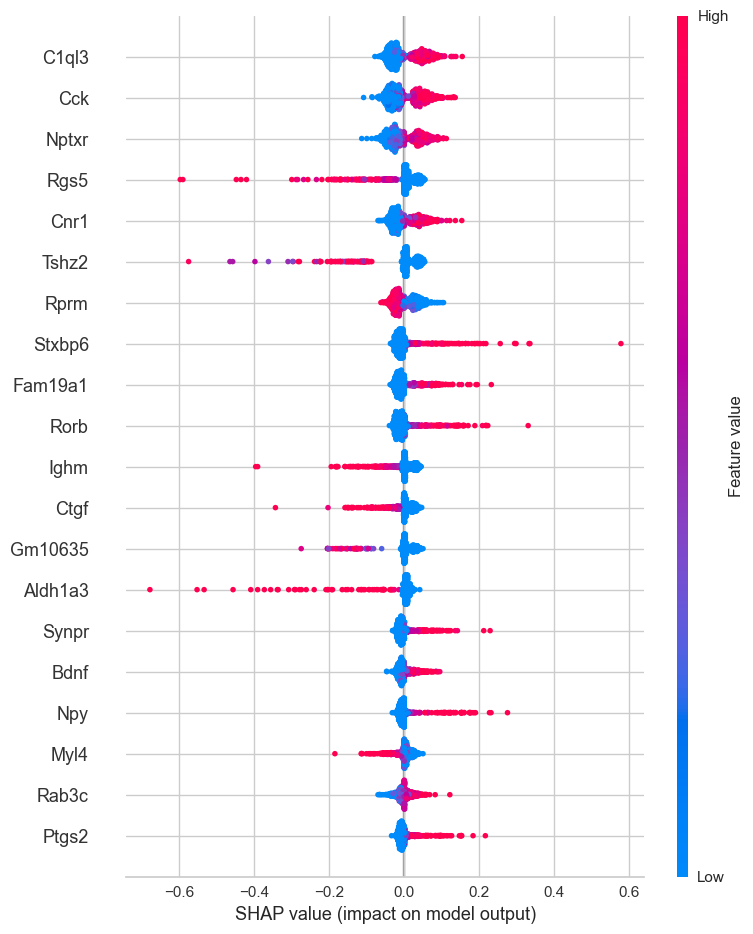

In [14]:
shap.summary_plot(shap_values, sub_sampled_test_data,show=False)
plt.savefig("./shap_results/fig6_AI var shap plot nb .pdf",dpi=1000)

In [15]:
save_model(nb, model_name='../results/fig6_model_AI_20220921')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/x9/gh5rsdsj7dq0tpfg31gj4c6c0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Cplx3', 'Tshz2', 'Npy', 'Myl4',
                                              'Pbld1', 'Ptgs2', 'Dlk1',
                                              'Gm13889', 'Cck', 'Lypd1', 'Etv1',
                                              'Nr4a2', 'Egr4', 'Stxbp6', 'Cyr61',
                                              'Nnat', 'Pou3f1', 'Aldh1a3',
                                              'Bdnf', 'Synpr', 'C1ql3', 'Arl4d',
                                              'Marcksl1', 'S100...
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categori